# Ahmad Gaitani Code ⚡

# **A database of 100 children, boys and girls**

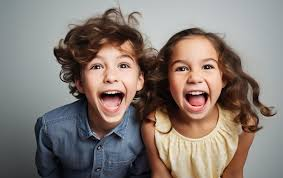

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from PIL import Image
import numpy as np
import os

# Define the base directory path
base_directory = '/content/drive/My Drive/known_faces/'

def load_and_resize_image(image_path, size=(150, 150)):
    # Open the image file
    img = Image.open(image_path)
    # Resize the image
    img_resized = img.resize(size)
    # Convert the image to a NumPy array
    img_array = np.array(img_resized)
    return img_array

# List files in the directory
files = os.listdir(base_directory)

# Initialize lists to store images and labels
X = []
y = []

# Process each image
for file_name in files:
    image_path = os.path.join(base_directory, file_name)
    try:
        # Load and resize the image
        image_array = load_and_resize_image(image_path)
        # Append image data to X
        X.append(image_array)
        # Create target label based on the number in the filename
        file_number = int(file_name.split('.')[0])
        if file_number % 2 == 1:
            y.append('boy')
        else:
            y.append('girl')
    except Exception as e:
        print(f"Error processing {file_name}: {e}")

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Print the shape of X and y to verify
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Example of how the data looks
print(f"First label: {y[0]}")


Error processing .ipynb_checkpoints: [Errno 21] Is a directory: '/content/drive/My Drive/known_faces/.ipynb_checkpoints'
X shape: (100, 150, 150, 3)
y shape: (100,)
First label: girl


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Normalize image data
X = X / 255.0

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


In [5]:
# Convert labels to one-hot encoded format
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [6]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Adjust the number of neurons based on the number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator with augmentation options
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)
# Apply data augmentation to your training data
datagen.fit(X_train)

In [13]:
history = model.fit(
    datagen.flow(X_train, y_train_cat, batch_size=16),
    epochs=15,
    validation_data=(X_val, y_val_cat),
    # steps_per_epoch=len(X_train) // 32
)


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7511 - loss: 0.4702 - val_accuracy: 0.7333 - val_loss: 0.6586
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 642ms/step - accuracy: 0.7379 - loss: 0.5774 - val_accuracy: 0.7000 - val_loss: 0.5878
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 660ms/step - accuracy: 0.7229 - loss: 0.5158 - val_accuracy: 0.6667 - val_loss: 0.5520
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7686 - loss: 0.4852 - val_accuracy: 0.6667 - val_loss: 0.5925
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 639ms/step - accuracy: 0.8373 - loss: 0.3528 - val_accuracy: 0.6667 - val_loss: 0.7280
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 909ms/step - accuracy: 0.6786 - loss: 0.5728 - val_accuracy: 0.7000 - val_loss: 0.7139
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 784ms/step - accuracy: 0.8326 - loss: 0.4508 - val_accuracy: 0.7333 - val_loss: 0.7121
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 640ms/step - accuracy: 0.7670 - loss: 0.4424 - val_accuracy: 0.6333 - val_loss: 0.684

In [14]:
# Evaluate the model
val_loss, val_acc = model.evaluate(X_val, y_val_cat)
print(f"Validation accuracy: {val_acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.7000 - loss: 0.6743
Validation accuracy: 0.7000


In [15]:
# Save the model
model.save('/content/drive/My Drive/cnn_model.h5')

In [16]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Create and fit the label encoder
label_encoder = LabelEncoder()
label_encoder.fit(y)  # Fit on your training labels

# Save the label encoder classes
np.save('/content/drive/My Drive/label_encoder_classes.npy', label_encoder.classes_)


In [19]:
import tensorflow as tf
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the saved model
model = tf.keras.models.load_model('/content/drive/My Drive/cnn_model.h5')

# Define the function to load, resize, and preprocess the new image
def preprocess_image(image_path, size=(150, 150)):
    img = Image.open(image_path)
    img_resized = img.resize(size)
    img_array = np.array(img_resized)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Load the label encoder classes
label_classes = np.load('/content/drive/My Drive/label_encoder_classes.npy')
label_encoder = LabelEncoder()
label_encoder.classes_ = label_classes

# Path to the new image
new_image_path = 'Ahmed.jpg'

# Preprocess the new image
new_image_array = preprocess_image(new_image_path)

# Make a prediction
prediction = model.predict(new_image_array)

# Decode the prediction
predicted_class = np.argmax(prediction, axis=1)
predicted_label = label_encoder.inverse_transform(predicted_class)

# Print the result
print(f"Predicted label: {predicted_label[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicted label: boy
